## Word Cloud Analysis - Russia Sentiment Tweets

In [49]:
import numpy as np
import pandas as pd  # for data analytics
from PIL import Image
# The two packages below are for plotting
import seaborn as sns  #seaborn has nice features. Need to load pyplot with seaborn at the same time
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [10]:
df = pd.read_csv('Russia_loc.csv',encoding ="latin-1")

In [11]:
df.head()

,Unnamed: 0,Datetime,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,sentiment_nltk
0,822,2022-03-14 23:56:36+00:00,@POTUS As long as it isnt african refugees (on...,ScottiAintCufin,"St. Petersburg, Russia",0,0,0,en,Twitter for Android,32,120,Neutral
1,2091,2022-03-14 23:51:00+00:00,"New from Zelensky, says in 19 days of war in #...",DannyWArmstrong,"Moscow, Russia",2,9,38,en,Twitter for iPhone,6577,931,Negative
2,2398,2022-03-14 23:49:44+00:00,@lisanandy Christ almightyâ¦I thought Putys p...,CatPutins,"Moscow, Russia",0,1,2,en,Twitter for iPad,3,58,Negative
3,4427,2022-03-14 23:41:20+00:00,@JohnnSpartan117 I agree these degenerates are...,memesterdatate1,Russia,0,0,0,en,Twitter Web App,1,6,Positive
4,4626,2022-03-14 23:40:33+00:00,@usanorthcoast @vasepot @ChthonicHydra @mkolke...,AgentOr22171584,"Magadan, Russia",2,0,6,en,Twitter for iPhone,223,1307,Neutral


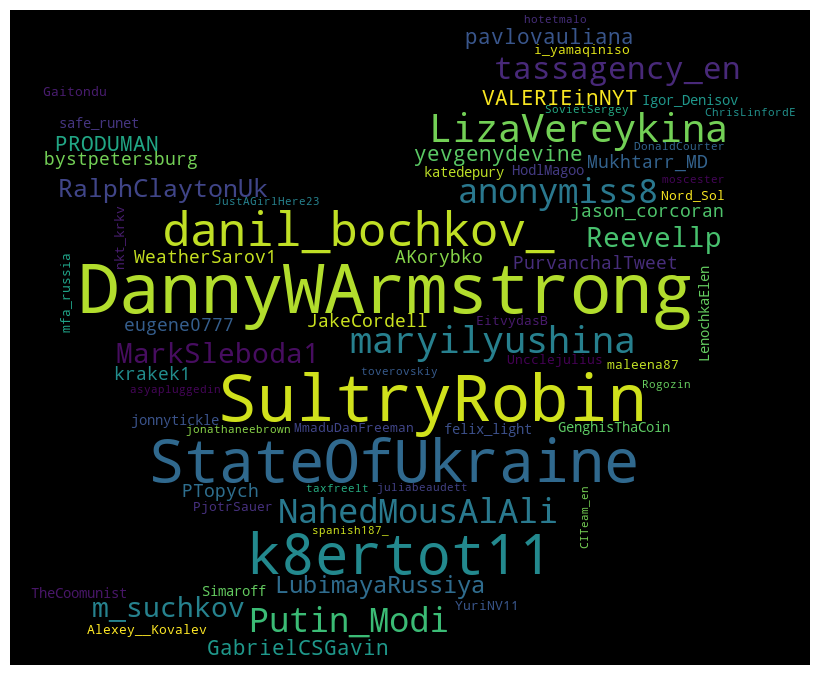

In [60]:
#Word Cloud of User who has more than 1000 Followers
mask = np.array(Image.open('twitter.png'))
word_ls = []
for val in df.Username[df['Follower Count']  >= 1000]:
    word_ls.append(val)

word_could_dict = Counter(word_ls)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',mask=mask,
                #stopwords = stopwords,
                min_font_size = 10).generate_from_frequencies(word_could_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

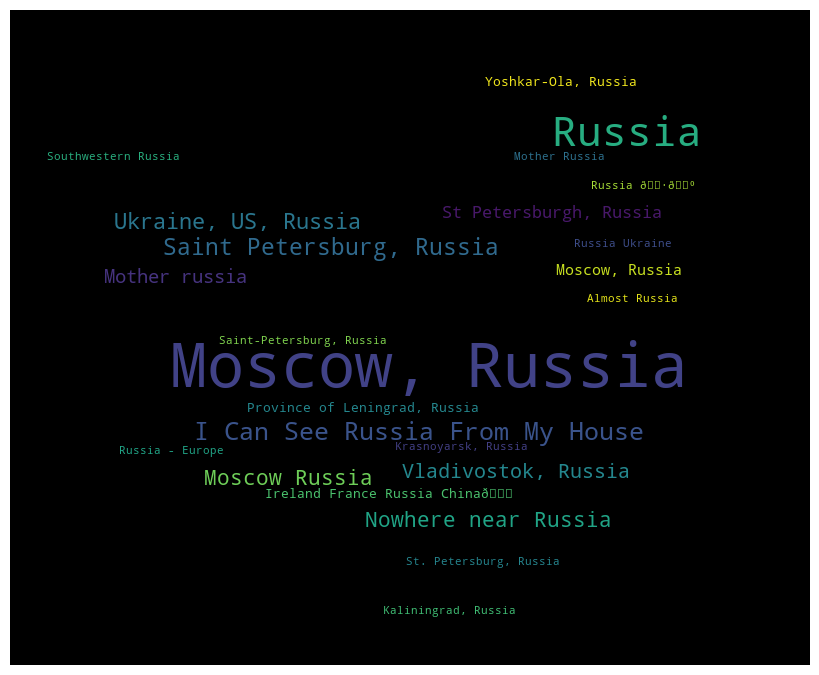

In [52]:
# Locations where the Sentiment of the Tweets is Negative
word_ls = []
for val in df.location[df.sentiment_nltk == 'Negative']:
    word_ls.append(val)

word_could_dict = Counter(word_ls)
#print(word_could_dict)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',mask=mask,
                #stopwords = stopwords,
                min_font_size = 10).generate_from_frequencies(word_could_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [14]:
import gensim
#from gensim.utils import simple_preprocess
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import spacy
import gensim.corpora as corpora

In [15]:
# clean_text takes in a pd.Series and removes special characters, stopwords, etc
def clean_text_nltk(pd_column):
    stop_words = list(set(stopwords.words('english')))  #use nltk stopwords
    clean = []
    for i in pd_column:
        i = i.lower()  #turn to lower case
        #print(i)
    
        #preprocess to split the words
        #re.split() has problem with '-' if no space between words, so first do i.split('-')
        i = i.split('-')
        i = ' '.join(i)
        i = i.split()
        #print(i)
    
        split_sent2 = []
        
        #remove stopwords and special characters
        for word in i:
            
            new_word = []
            if word not in stop_words and word[0]!='@' and word[0:4] != 'http' and word[0]!='#':
            #check each word to remove stop words, @username, website, hash-tag

                for letter in word:  #check each letter in word to remove special characters
                    if letter.isalpha(): #or letter.isdigit():
                        new_word.append(letter)
                    else:
                        pass
                word2 = ''.join(new_word)
                #print(word2)
                
                if word2 in stop_words or len(word2) < 3: #check stopwords again
                    pass
                else:
                    split_sent2.append(word2)
            else:
                pass
            
        #print(split_sent2)
        
        sent2 = ' '.join(split_sent2)
        clean.append(sent2)
    
    #print(clean[0:10])
    return(clean)

In [16]:
test = clean_text_nltk(df['Text'])
test[0:5]

['long isnt african refugees ones migrate ukraine take advantage crisis',
 'new zelensky says days war russia already lost long bloody chechen wars addresses russian officers âyou already know take nothing ukraine many lives take dying whyâ',
 'christ almightyâi thought putys politicians lying twots misinformation coming brit equivalent beyond equal journalists bad seems get worse ukraine praises boris like mad dogs amp know mad dogs live one',
 'agree degenerates cringe embarrassing ukrainian culture used love ukraine popular cringe still day love americans need stop',
 'ukraine simple next question']

In [17]:
# Tokenization, input is pd.Series with full sentences
from nltk.tokenize import sent_tokenize, word_tokenize

def nltk_tokenizer(pd_column):
    tokenized = []
    for i in pd_column:
        word_tokens = word_tokenize(i)
        tokenized.append(word_tokens)
    return tokenized

In [18]:
df_tokenized = pd.Series(nltk_tokenizer(test))
df_tokenized.head()

0    [long, isnt, african, refugees, ones, migrate,...
1    [new, zelensky, says, days, war, russia, alrea...
2    [christ, almightyâi, thought, putys, politicia...
3    [agree, degenerates, cringe, embarrassing, ukr...
4                    [ukraine, simple, next, question]
dtype: object

In [19]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)

In [20]:
df['Clean Text'] = clean_text_nltk(df['Text'])
df['Tokens'] = pd.Series(nltk_tokenizer(test))

In [21]:
df.head()

,Unnamed: 0,Datetime,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,sentiment_nltk,Clean Text,Tokens
0,822,2022-03-14 23:56:36+00:00,@POTUS As long as it isnt african refugees (ones that migrate to Ukraine to take advantage of the crisis),ScottiAintCufin,"St. Petersburg, Russia",0,0,0,en,Twitter for Android,32,120,Neutral,long isnt african refugees ones migrate ukraine take advantage crisis,"[long, isnt, african, refugees, ones, migrate, ukraine, take, advantage, crisis]"
1,2091,2022-03-14 23:51:00+00:00,"New from Zelensky, says in 19 days of war in #Ukraine, Russia already lost more than in 2 long, bloody Chechen Wars.\nAddresses Russian officers: âYou already know, you will take nothing from Ukraine. Many lives. But they will take yours too. You are dying for what? And why?â https://t.co/e5ZBIVlEYq",DannyWArmstrong,"Moscow, Russia",2,9,38,en,Twitter for iPhone,6577,931,Negative,new zelensky says days war russia already lost long bloody chechen wars addresses russian officers âyou already know take nothing ukraine many lives take dying whyâ,"[new, zelensky, says, days, war, russia, already, lost, long, bloody, chechen, wars, addresses, russian, officers, âyou, already, know, take, nothing, ukraine, many, lives, take, dying, whyâ]"
2,2398,2022-03-14 23:49:44+00:00,"@lisanandy Christ almightyâ¦I thought Putys politicians were lying twots. The misinformation coming from the brit equivalent is beyond equal. \nThe Journalists are as bad. It seems to get worse the more Ukraine praises Boris and the UK. Like mad dogs &amp; I know about mad dogs, I live with one.",CatPutins,"Moscow, Russia",0,1,2,en,Twitter for iPad,3,58,Negative,christ almightyâi thought putys politicians lying twots misinformation coming brit equivalent beyond equal journalists bad seems get worse ukraine praises boris like mad dogs amp know mad dogs live one,"[christ, almightyâi, thought, putys, politicians, lying, twots, misinformation, coming, brit, equivalent, beyond, equal, journalists, bad, seems, get, worse, ukraine, praises, boris, like, mad, dogs, amp, know, mad, dogs, live, one]"
3,4427,2022-03-14 23:41:20+00:00,@JohnnSpartan117 I agree these degenerates are just cringe and embarrassing the Ukrainian culture!!! I used to love Ukraine when it wasn't popular and cringe i still to this day love it but these Americans need to stop!!!!,memesterdatate1,Russia,0,0,0,en,Twitter Web App,1,6,Positive,agree degenerates cringe embarrassing ukrainian culture used love ukraine popular cringe still day love americans need stop,"[agree, degenerates, cringe, embarrassing, ukrainian, culture, used, love, ukraine, popular, cringe, still, day, love, americans, need, stop]"
4,4626,2022-03-14 23:40:33+00:00,@usanorthcoast @vasepot @ChthonicHydra @mkolken Ukraine. That was simple. Next question.,AgentOr22171584,"Magadan, Russia",2,0,6,en,Twitter for iPhone,223,1307,Neutral,ukraine simple next question,"[ukraine, simple, next, question]"


In [22]:
# First thing before using countVectorizer and TF-IDF, need to flat to a single list the cleaned sentences
def flat(lis):
    flatList = []
    # Iterate with outer list
    for element in lis:
        if type(element) is list:
            # Check if type is list than iterate through the sublist
            for item in element:
                flatList.append(item)
        else:
            flatList.append(element)
    return flatList

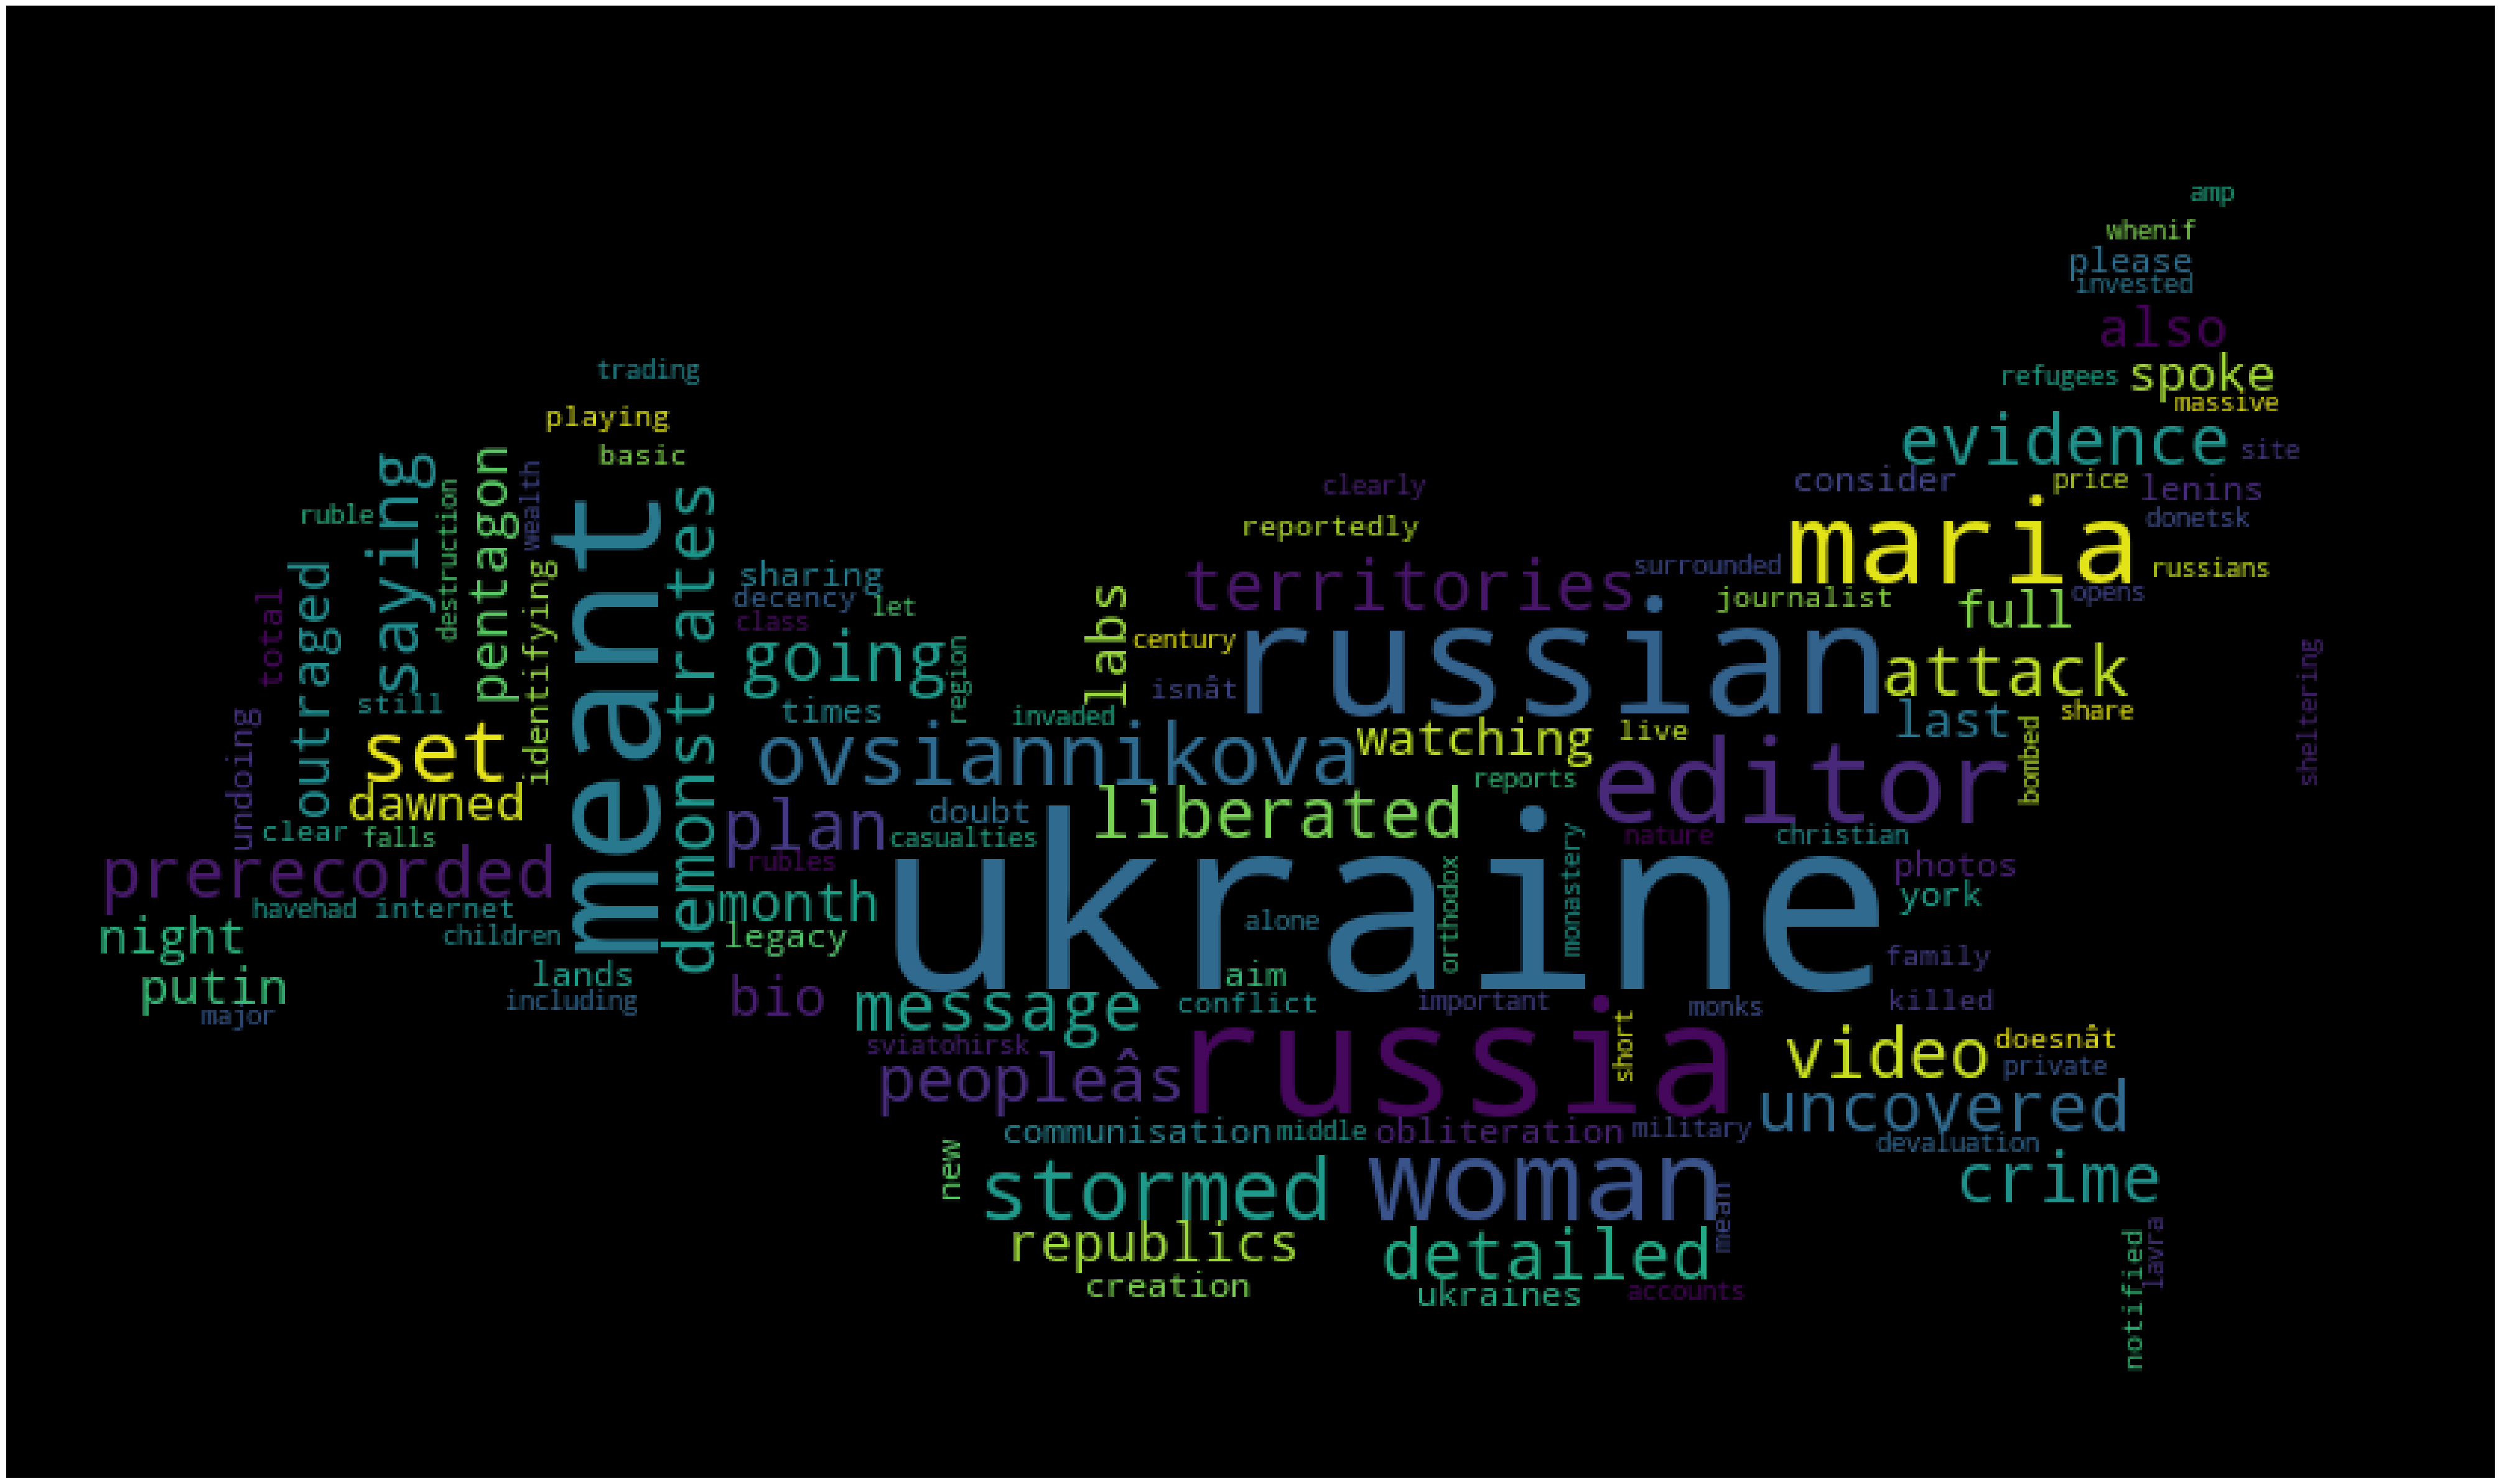

In [61]:
# Word Cloud:Important tokens in Tweets when the count of Likes are higher than 1,000 
mask = np.array(Image.open('russia.png'))
word_ls = []
for val in df['Tokens'][df['like count']  >= 1000]:
    word_ls.append(val)
    word_ls2= flat(word_ls)
word_could_dict = Counter(word_ls2)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black', mask=mask,
                #stopwords = stopwords,
                min_font_size = 8).generate_from_frequencies(word_could_dict)

plt.figure(figsize = (40, 40), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()